# Proyecto No. 1 - Regresion Lineal Uni-Variable
------
* Mario Esau Alvarado Contreras - Ciencia de Datos con Python.


### 1. Entorno y Librerias 
-----

In [298]:
# Librerias para Tratamiento de datos
import numpy as np
import pandas as pd

In [299]:
# Libreria para creación de Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LinearRegression
style.use('dark_background')
#style.use('ggplot')

In [300]:
# Libreria para Preprocesado y modelado de datos
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


### 2. Carga y exploracion de Datos.
-----

In [301]:
ds = np.load('proyecto_training_data.npy', allow_pickle = False)
ds.shape

(1460, 6)

In [302]:
ds

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

- Media
- Valor maximo
- Valor mınimo
- Rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
- desviacion estandar.

In [303]:
dataset = int(ds.shape[0]*0.8)
np.random.shuffle(ds)
entrenamiento, pruebas = ds[:dataset], ds[dataset:]

entrenamiento.shape, pruebas.shape

((1168, 6), (292, 6))

In [304]:
ds = pd.DataFrame(ds,columns =['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
entrenamiento = pd.DataFrame(entrenamiento, columns=['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
pruebas = pd.DataFrame(pruebas, columns =['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [305]:
ds.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [306]:
rango = ds.max() - ds.min()
rango = pd.DataFrame(np.array(rango).reshape((1,-1)),columns=['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])
rango

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,720100.0,9.0,4358.0,12.0,138.0,292.0


In [307]:
ds.shape

(1460, 6)

In [308]:
ds.dtypes

SalePrice       float64
OverallQual     float64
1stFlrSF        float64
TotRmsAbvGrd    float64
YearBuilt       float64
LotFrontage     float64
dtype: object

<Axes: >

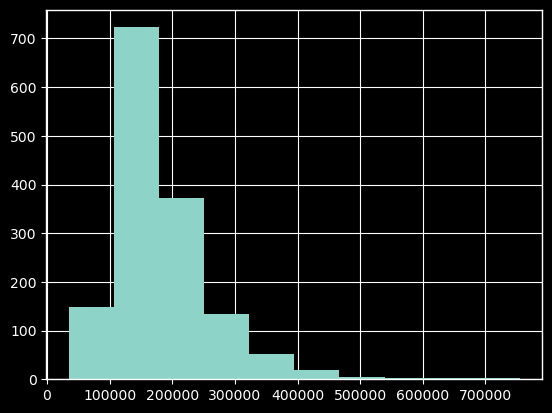

In [309]:
ds['SalePrice'].hist()

### 3. Usando Seaborn y creando Histogramas. 

array([[<Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'OverallQual'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'LotFrontage'}>]], dtype=object)

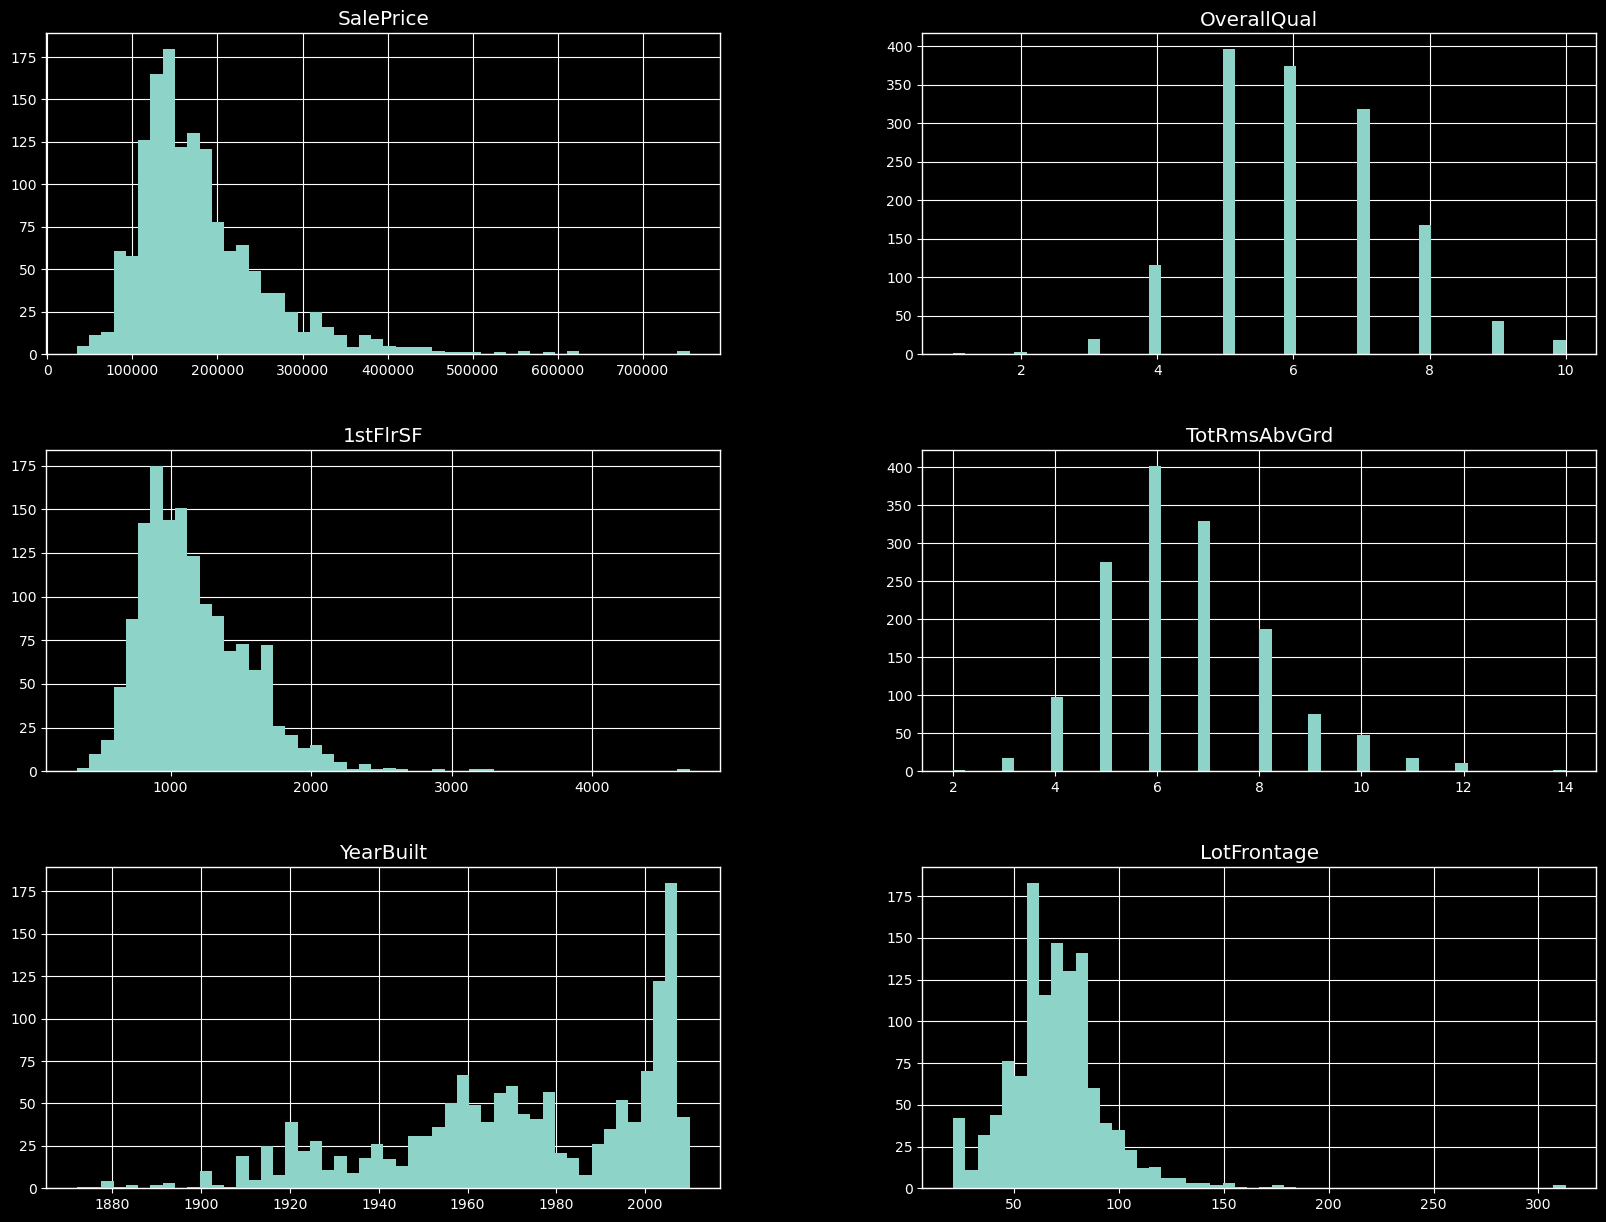

In [310]:
ds.hist(bins=50,figsize=(20,15))

### 4. Generando Correlaciones
-----

<Axes: xlabel='SalePrice', ylabel='SalePrice'>

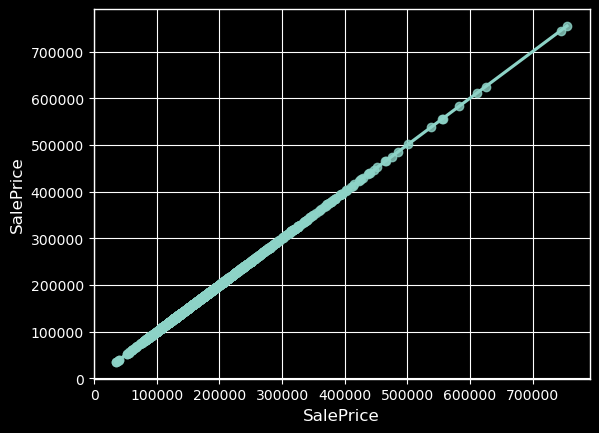

In [311]:
sns.regplot(x='SalePrice', y= 'SalePrice' , data = ds )

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

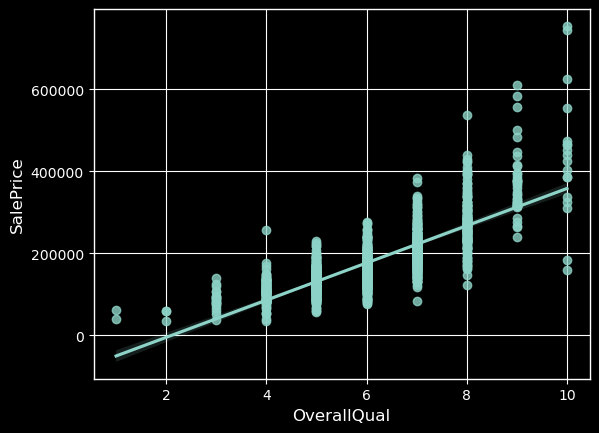

In [312]:
sns.regplot(x='OverallQual', y= 'SalePrice' , data = ds )

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

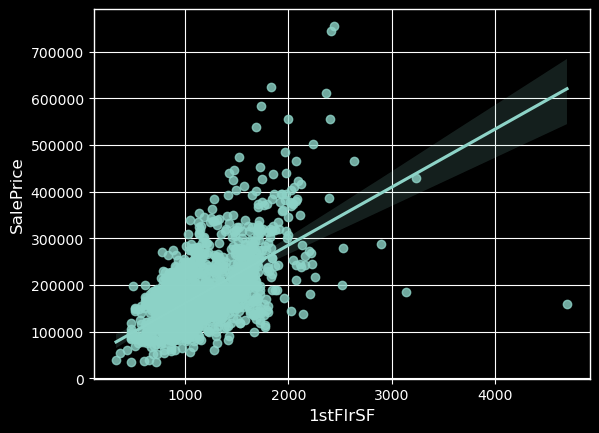

In [313]:
sns.regplot(x='1stFlrSF', y= 'SalePrice' , data = ds )

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

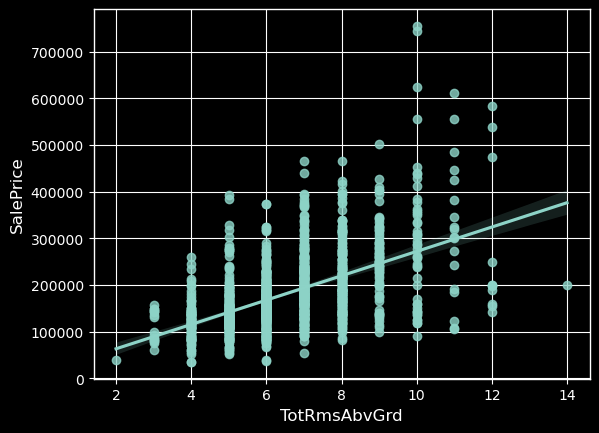

In [314]:
sns.regplot(x='TotRmsAbvGrd', y= 'SalePrice' , data = ds )

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

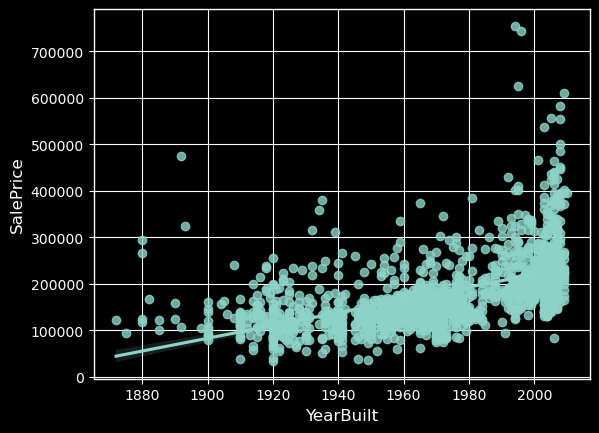

In [315]:
sns.regplot(x='YearBuilt', y= 'SalePrice' , data = ds )

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

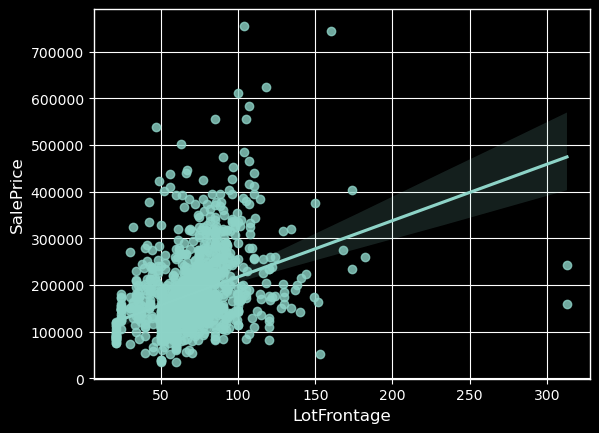

In [316]:
sns.regplot(x='LotFrontage', y= 'SalePrice' , data = ds )

In [317]:
def correlacioxy(data, X, Y):
    corr = (pd.DataFrame(ds[[X, Y]]).corr().iloc[0,1])
    plt.figure(figsize = (6,3))
    plt.scatter(data = ds, x = X, y = Y)
    plt.title(str(X)+' vs '+ str(Y) + ' | Corr:'+str((round(corr,4))), fontsize = 12)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.show()
    return round(corr,4)

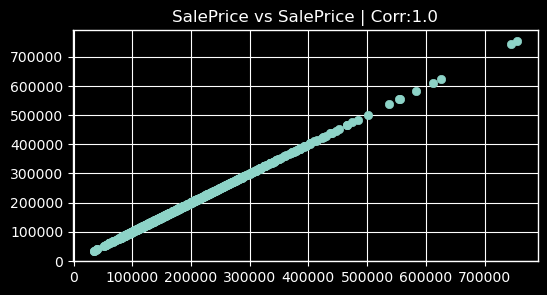

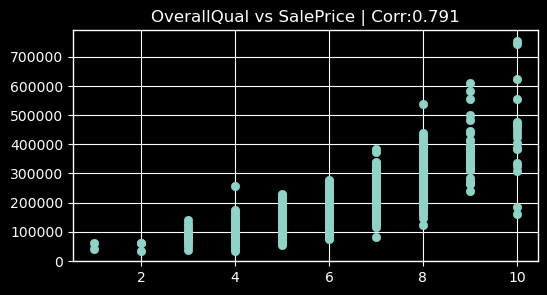

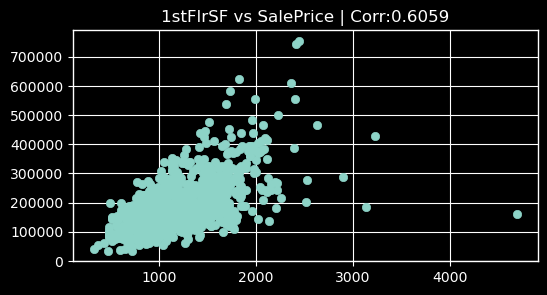

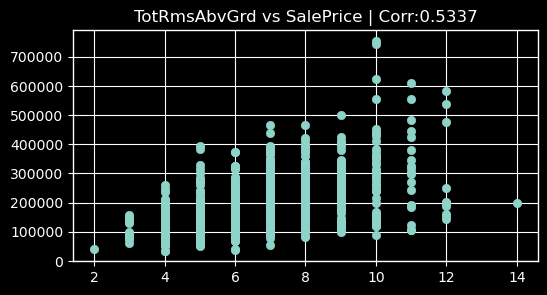

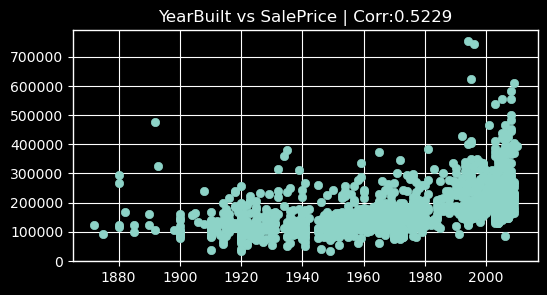

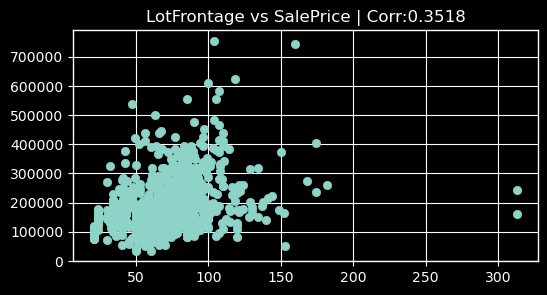

In [318]:
variables = []
correlaciones = []
for i in data.columns.to_list():
    variables.append(i)
    correlaciones.append(correlacioxy(entrenamiento, i, 'SalePrice'))

In [319]:
corr_variables_may = pd.DataFrame({'Variable':variables, 
                                   'Correlacion':correlaciones})
corr_variables_may.sort_values(by='Correlacion', ascending = False)[1:3]

,Variable,Correlacion
1,OverallQual,0.7910
2,1stFlrSF,0.6059


OverallQual y 1stFlrFS posibles variables con mayor grado para predicciones

In [320]:
entre_OverallQual = np.array(entrenamiento['OverallQual']) 
entre_1stFlrSF = np.array(entrenamiento['1stFlrSF'])
entre_SalePrice = np.array(entrenamiento['SalePrice'])

### 5. Funcion de Regresion

In [321]:
class univ_linear_reg():
    def __init__(self, x, y, epochs = 1000, imprimir_error_cada=100, learning_rate = 0.001):
        
        # Se capturan parámetros de la regresión
        self.imprimir_error_cada = imprimir_error_cada
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.x_original = x
        self.vect_ones = np.ones_like(x).reshape(-1,1)
        
        
        #Vectorizando X y Y
        self.xr = np.reshape(x,(-1,1))
        self.xr = np.hstack([self.xr,self.vect_ones])
        self.yr = np.reshape(y, (-1,1))
        
        #inicializando betas  
        self.b0 = np.random.default_rng().normal(np.average(self.x_original), np.std(self.x_original))
        self.b1 = np.random.default_rng().normal(np.average(self.yr), np.std(self.yr))

        self.betas = np.array([[self.b1],[self.b0]])
        
        #inicio de almacenamiento de errores y modelo
        self.errors = []
        self.models = {}
        
        for i in range(0, self.epochs):
            #Predicciones
            self.y_pred = np.matmul(self.xr, self.betas)
            
            #Calculo del error
            self.e = 1/(2*self.yr.shape[0]) * np.sum((self.yr - self.y_pred)**2)
            self.errors.append(self.e)
            
            #crea una estructura de datos (diccionario) que almacena los betas
            self.models[i] = [self.betas, self.y_pred, self.yr, self.x_original]

            #calculando gradientes
            self.gradient = (1/self.yr.shape[0]) * sum((self.y_pred - self.yr)*self.xr)
            self.mult_gradient = (self.learning_rate*self.gradient)
            self.mult_gradient = self.mult_gradient.reshape((-1,1))

            #Actualizando Betas
            self.betas = self.betas - self.mult_gradient

            #Imprimiendo resultados cada n veces
            if i%self.imprimir_error_cada==0:
                print('Iteración: ', i)
                print('Error: ',self.e)
                print("")
        
    #Función que devuelve la estructura de datos anterior y un array con los errores    
    def trained_models(self):
        return self.models , np.array(self.errors)
    
    #Función que recibe un array x como parámetro y devuelve una y predicha a partir del modelo entrenado
    def predictions(self, x_rp):
        self.x_rp = x_rp
        self.vect_ones_xp = np.ones_like(self.x_rp).reshape(-1,1)
        self.xp = np.reshape(self.x_rp,(-1,1))
        self.xp = np.hstack([self.xp,self.vect_ones_xp])
        self.yp = np.matmul(self.xp, self.betas)
        return self.yp

    #Función que permite calcular los errores entre los valores reales de Y, y los valores predichos
    @staticmethod
    def error_predictions(ypp, ypr):
        ep = 1/(2*ypp.shape[0]) * np.sum((ypr - ypp)**2)
        return ep
    
    #Función/Proceso que gráfica los errorres del modelo. Parametro, un array con los errores del modelo
    @staticmethod
    def error_plot(errors):
        plt.figure(figsize = (7,5))
        plt.plot(errors)
        plt.title("Errores del modelo", fontsize = 12)
        plt.xlabel("Epoch", fontsize = 10)
        plt.ylabel("Errores")
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)
        plt.show()
        
    ##Función/Proceso que gráfica la evolución del modelo entrenado
    @staticmethod
    def model_plot(models_t,n):
        fig = plt.figure(figsize = (9,6))
        ax =  fig.add_axes([0.1,0.1,0.7,0.7])
        ax.set_title('Comparativa de modelos')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        i = 0
        for k in models_t.keys():
            if k%n == 0 and k != 0:
                ax.scatter(x = models_t[k][3], y = models_t[k][2], color = '#CDCDCD')
                ax.plot(models_t[k][3],  models_t[k][1], linestyle ='solid', color ='#93b5d9')

            if k == max(models_t.keys()):
                ax.plot(models_t[k][3],  models_t[k][1], linestyle ='solid', color ='#0051ff')
                ax.text(max(models_t[k][3]),max(models_t[k][1])+100, 'Modelo '+str(k), fontsize='small')
        plt.show()
        
    #Función/Proceso que gráfica cómo evolucionan los betas en el tiempo (epochs)
    @staticmethod
    def betas_plot(models):
        b0 = []
        b1 = []
        for k in models.keys():
            b1.append(models[k][0][0])
            b0.append(models[k][0][1])
        fig = plt.figure(figsize = (8,5))
        ax =  fig.add_axes([0.1,0.1,0.7,0.7])
        ax.plot(b0)
        ax.plot(b1)
        ax.legend(['B0','B1'])
        ax.set_title('Evolución de Betas')
        ax.set_ylabel('Betas')
        ax.set_xlabel('Epocs')
        
    #Función que recibe como parametros dos modelos entrenados y a partir de ellos predice los valores de una x dada                
    @staticmethod
    def model_comparative(model1, model2 , x):
        #predicciones del modelo propio
        result_m1 = model1.predictions(x)
        #predicciones de sklearn
        result_m2 = model2.predict(x.reshape(-1,1))        
        #promedio de ambos modelos
        avg_result = (result_m1 + result_m2)/2
        return result_m1, result_m2, avg_result
    
    
    #Función/Proceso que recibe una Tupla con las predicciones de model_comparative y los valores reales de y, gráfica el error de cada modelo
    @staticmethod
    def ploting_error_models(modelos, y):
        i = 0
        labels = []
        e_modelos = []
        for r in modelos:
            i +=1
            e_modelos.append(univ_linear_reg.error_predictions(r, y))
            labels.append('Modelo'+str(i) + '\n'+str(round(univ_linear_reg.error_predictions(r, y),0)))
        plt.figure(figsize =(8,5))
        fig, ax = plt.subplots()
        ax.bar(labels, e_modelos)
        fig.tight_layout()
        plt.show()

### 6. Regresion con OverallQual - Entrenamiento de Modelo.

In [322]:
m1 = univ_linear_reg(entre_OverallQual, 
                     entre_SalePrice, 
                     6001,1200,0.01)
m1_modelos, m1_errores = m1.trained_models()    

Iteración:  0
Error:  478688932218.7665

Iteración:  1200
Error:  1229826157.414269

Iteración:  2400
Error:  1199062140.3974106

Iteración:  3600
Error:  1189510526.492407

Iteración:  4800
Error:  1186544940.8167691

Iteración:  6000
Error:  1185624185.592886



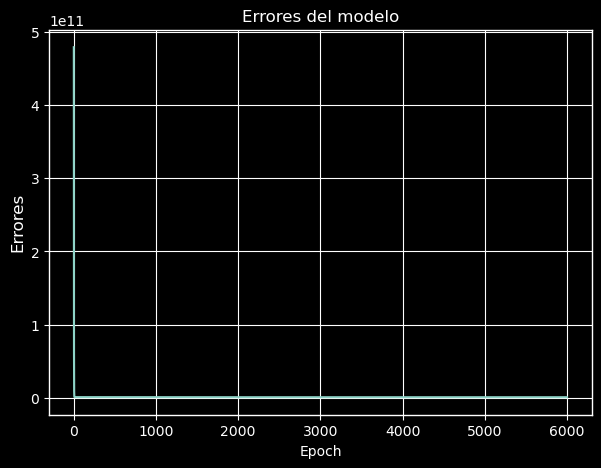

In [323]:
univ_linear_reg.error_plot(m1_errores)

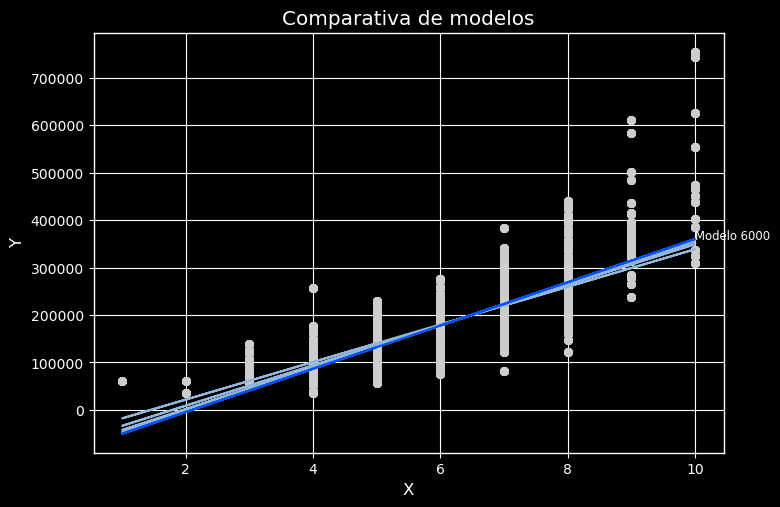

In [324]:
univ_linear_reg.model_plot(m1_modelos, 1200)

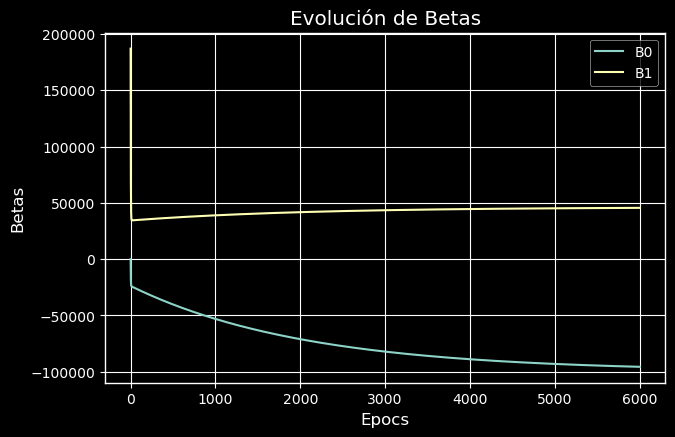

In [325]:
univ_linear_reg.betas_plot(m1_modelos)

### 7. Regresion con con 1stFlrSF - Entrenamiento de Modelo.
-----

In [326]:
m2 = univ_linear_reg(entre_1stFlrSF, 
                     entre_SalePrice, 
                     51,10,0.000001)
m2_modelos, m2_errores = m2.trained_models() 

Iteración:  0
Error:  2.944341529282827e+16

Iteración:  10
Error:  22233000239.046238

Iteración:  20
Error:  1923839042.8243186

Iteración:  30
Error:  1923824993.7267914

Iteración:  40
Error:  1923824953.2642002

Iteración:  50
Error:  1923824912.8113494



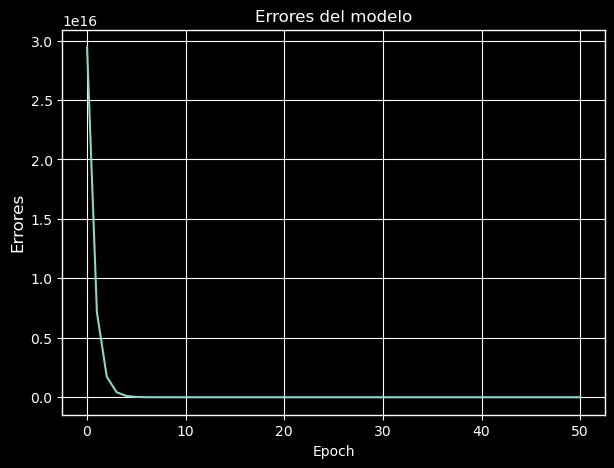

In [327]:
univ_linear_reg.error_plot(m2_errores)

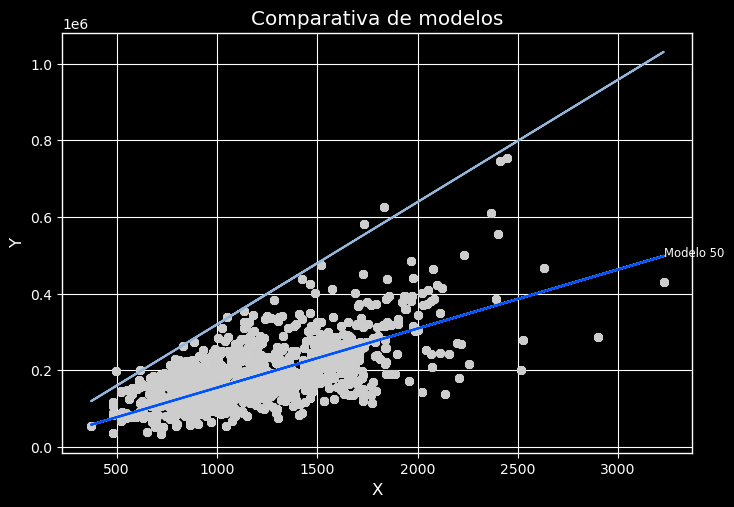

In [328]:
univ_linear_reg.model_plot(m2_modelos, 10)

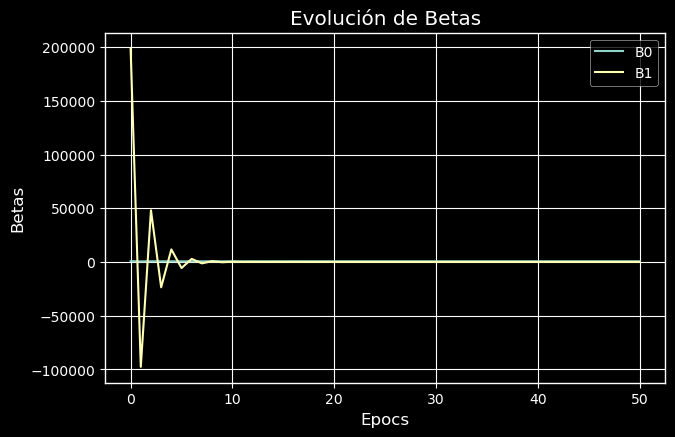

In [329]:
univ_linear_reg.betas_plot(m2_modelos)

### 8. Entrenamiento con Scikit Learn

In [330]:
skm1 = LinearRegression().fit(entre_OverallQual.reshape(-1,1), entre_SalePrice.reshape(-1,1))
skm2 = LinearRegression().fit(entre_1stFlrSF.reshape(-1,1), entre_SalePrice.reshape(-1,1))

#### Predicciones

In [331]:
pruebas_OverallQual = np.array(pruebas['OverallQual'])
pruebas_1stFlrSF = np.array(pruebas['1stFlrSF'])
pruebas_SalePrice = np.array(pruebas['SalePrice'])

In [332]:
modelos_OverallQual = univ_linear_reg.model_comparative(m1, skm1, pruebas_OverallQual)
modelos_1stFlrSF = univ_linear_reg.model_comparative(m2, skm2, pruebas_1stFlrSF)

<Figure size 800x500 with 0 Axes>

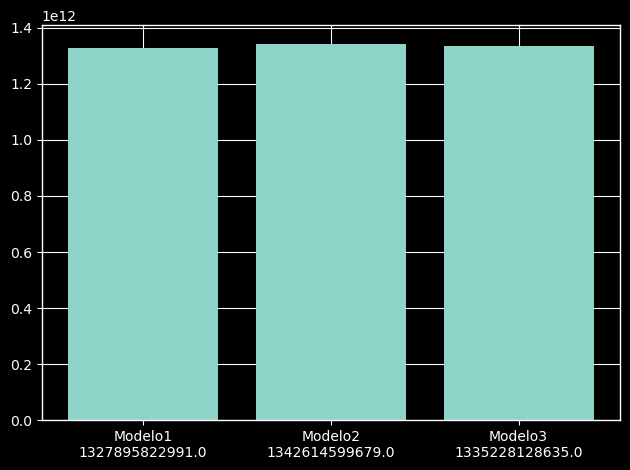

In [333]:
univ_linear_reg.ploting_error_models(modelos_OverallQual, pruebas_SalePrice)

<Figure size 800x500 with 0 Axes>

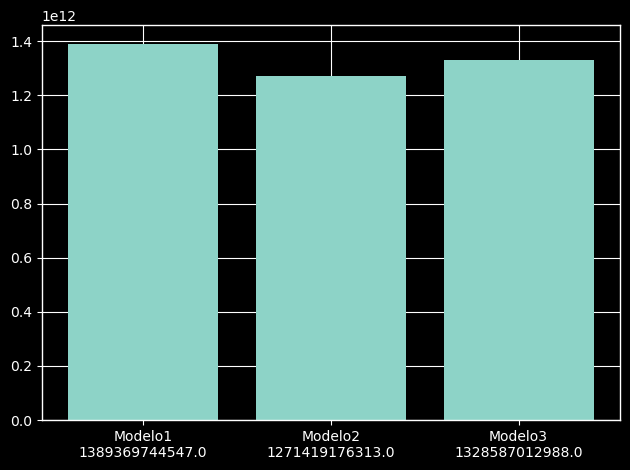

In [334]:
univ_linear_reg.ploting_error_models(modelos_1stFlrSF, pruebas_SalePrice)